**MRI Speech Identification**

We want to identify vocals with real-time MRI data. The MRI records peoples vocal tract while speaking. Our approach is to take pixel vectors of every time frame where A, E and O is spoken. Then give this vectors to a LSTM Model, which should pedict what letter a person is currently speaking.

[GitHub](https://github.com/Johannes-Walter/MRI-Speech-Identification/blob/main/train_Johannes.ipynb)

Code-Demo

In [12]:
%load_ext autoreload
%autoreload 2

## Imports

In [1]:
#connect to gdrive
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.insert(0,"/content/drive/My Drive/Colab Notebooks")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
#imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
import data_preparer
import data_reader
from data_vectorizer import Vectorizer
from pathlib import Path
from keras.utils import to_categorical
import keras
from sklearn.model_selection import train_test_split

# Setup Training Data

In [2]:
# Setup traing data
vectors, letters = data_preparer.get_randomized_vectors(100)
length = data_preparer.get_max_frames()

vectors = data_preparer.make_numpy(vectors, length)

In [3]:
items = set(letters)

items = {
    item: idx
    for idx, item in enumerate(items)
}

for idx, item in enumerate(letters):
    letters[idx] = items[item]

letters = np.array(letters)
letters = keras.utils.to_categorical(letters)

In [4]:
vectors.shape

(18000, 7, 1860)

In [5]:
letters.shape

(18000, 3)

Vectors consist of (Letters, Vecotrs, pixel length*timephrames)

**Letters**: How many letters we are using -> 18000

**Vectors**: How many vectors we are using frame per frame -> 7

**Pixel lenght**: How long is one vector -> 20 pixel

**Timephrames**: how many timephrames per letter (this differs form letter to letter -> filled with zeros)

# Training

In [6]:
# # Mini Model
# model = keras.Sequential()
# model.add(keras.layers.LSTM(1))
# model.add(keras.layers.Dense(3, activation='sigmoid'))


In [7]:
# Small Model
model = keras.Sequential()
model.add(keras.layers.LSTM(20))
model.add(keras.layers.Dense(10, activation='sigmoid'))
model.add(keras.layers.Dense(3, activation='sigmoid'))

In [8]:
# # Big Model
# model = keras.Sequential()
# model.add(keras.layers.LSTM(1860))
# model.add(keras.layers.Dense(100, activation='sigmoid'))
# model.add(keras.layers.Dense(10, activation='sigmoid'))
# model.add(keras.layers.Dense(3, activation='sigmoid'))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(vectors, letters, test_size=0.2, random_state=13)

# mean_squared_error loss: 0.0578 - accuracy: 0.8894
# mean_squared_logarithmic_error loss: 0.0289 - accuracy: 0.8875
# logcosh loss: 0.0328 - accuracy: 0.8528

model.compile(loss='mean_squared_error',
              optimizer='Adamax',
              metrics=['CategoricalAccuracy'])
model.fit(X_train, y_train,
          epochs=25,
          verbose=1
          )

Epoch 1/25
450/450 [==============================] - 2s 4ms/step - loss: 0.2027 - categorical_accuracy: 0.5303
Epoch 2/25
450/450 [==============================] - 2s 4ms/step - loss: 0.1664 - categorical_accuracy: 0.6817
Epoch 3/25
450/450 [==============================] - 2s 4ms/step - loss: 0.1386 - categorical_accuracy: 0.7497
Epoch 4/25
450/450 [==============================] - 1s 3ms/step - loss: 0.1207 - categorical_accuracy: 0.7938
Epoch 5/25
450/450 [==============================] - 1s 3ms/step - loss: 0.1111 - categorical_accuracy: 0.8108
Epoch 6/25
450/450 [==============================] - 1s 3ms/step - loss: 0.1040 - categorical_accuracy: 0.8288
Epoch 7/25
450/450 [==============================] - 1s 3ms/step - loss: 0.0939 - categorical_accuracy: 0.8378
Epoch 8/25
450/450 [==============================] - 1s 3ms/step - loss: 0.0868 - categorical_accuracy: 0.8439
Epoch 9/25
450/450 [==============================] - 1s 3ms/step - loss: 0.0837 - categorical_accuracy:

In [10]:
X_train

array([[[ 46.34273148,  40.93534088,  40.76840591, ...,   0.        ,
           0.        ,   0.        ],
        [ 87.07800293,  86.98377228,  87.00466156, ...,   0.        ,
           0.        ,   0.        ],
        [ 30.33987236,  30.39394951,  30.40770531, ...,   0.        ,
           0.        ,   0.        ],
        ...,
        [296.73486328, 296.74990845, 297.88491821, ...,   0.        ,
           0.        ,   0.        ],
        [260.82235718, 260.89923096, 261.05966187, ...,   0.        ,
           0.        ,   0.        ],
        [234.7341156 , 225.28033447, 225.21989441, ...,   0.        ,
           0.        ,   0.        ]],

       [[ 51.30752182,  51.31867981,  51.3074379 , ...,   0.        ,
           0.        ,   0.        ],
        [ 15.68519211,  32.07077789,  32.34102631, ...,   0.        ,
           0.        ,   0.        ],
        [ 32.88678741,  28.00318909,  27.89270782, ...,   0.        ,
           0.        ,   0.        ],
        ...,


In [11]:
score, acc = model.evaluate(X_test, y_test)

113/113 [==============================] - 0s 1ms/step - loss: 0.0486 - categorical_accuracy: 0.9067


In [12]:
# model.save(r"models/mini")

In [13]:
# model = keras.models.load_model(r"models/mini") # ~ 60 % accuracy
# model = keras.models.load_model(r"models/small") # ~ 90 % accuracy
# model = keras.models.load_model(r"models/big") # ~ 95 % accuracy (nur auf meinem PC, zu groß für Github)

# Prediction

Wir lesen die CSV Tabelle und die passende H5 Datei ein:

In [14]:
timestamps = data_reader.get_timestamps(r'sub001_2drt_01_vcv1_r1_recon.csv')
timestamps

,Buchstabe,Buchstabenr.,Timestamp start,Timestamp ende,first_frame,last_frame
0,A,1,0 days 00:00:01.726000,0 days 00:00:02.348000,143.0,195.0
1,A,2,0 days 00:00:02.605000,0 days 00:00:03.079000,216.0,256.0
2,O,1,0 days 00:00:04.369000,0 days 00:00:04.644000,363.0,386.0
3,O,2,0 days 00:00:04.844000,0 days 00:00:05.293000,403.0,440.0
4,E,1,0 days 00:00:06.452000,0 days 00:00:06.720000,537.0,559.0
5,E,2,0 days 00:00:06.889000,0 days 00:00:07.336000,573.0,610.0
6,A,3,0 days 00:00:08.342000,0 days 00:00:08.567000,694.0,713.0
7,A,4,0 days 00:00:08.822000,0 days 00:00:09.348000,734.0,778.0
8,O,3,0 days 00:00:10.435000,0 days 00:00:10.522000,869.0,876.0
9,O,4,0 days 00:00:10.773000,0 days 00:00:11.216000,897.0,934.0


In [15]:
recon = data_reader.get_recon('sub001_2drt_01_vcv1_r1_recon.h5')
recon

array([[[ 25.52947807,  19.4853611 ,  30.89460373, ...,  98.42479706,
          44.64346695, 107.51438904],
        [ 32.15190125,  13.87260723,  15.70765495, ..., 102.3542099 ,
          86.98400879,  66.88175964],
        [ 28.86750793,  18.92897797,   3.64901137, ...,  62.36549377,
          90.75772858,  69.96509552],
        ...,
        [ 39.63859177,  40.24220657,  32.62986374, ...,  47.44071579,
          75.16679382, 150.60792542],
        [  7.83577919,  30.93974304,  37.56563187, ...,  13.19073009,
          84.4291153 , 119.56649017],
        [ 13.083848  ,  40.89576721,  21.82175064, ..., 137.2555542 ,
         148.56011963,  80.77766418]],

       [[ 25.62266159,  19.44618225,  30.86223984, ...,  98.21442413,
          44.60578537, 107.47366333],
        [ 32.05347824,  13.85059452,  15.73060513, ..., 102.25723267,
          86.92198944,  66.85616302],
        [ 28.90059662,  19.00435066,   3.6461184 , ...,  62.19660187,
          90.79077148,  69.95095062],
        ...,


Wir erstellen die Vektoren:

In [16]:
vectorizer = Vectorizer(recon, timestamps)
rel = vectorizer.get_vectors_relative_position(0)
abss = vectorizer.get_vectors_absolute_position(rel,0)
mask = vectorizer.get_mask(abss)

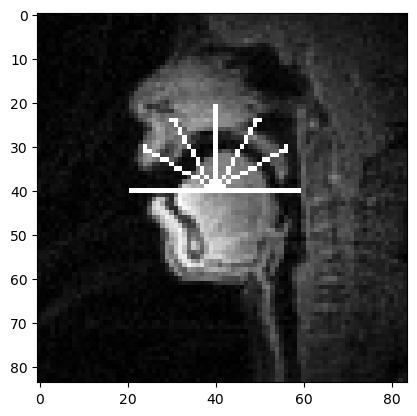

In [17]:
img = np.ma.masked_array(recon[int(timestamps['first_frame'][0])], np.logical_not(mask))
plt.imshow(img, cmap="Greys_r")

Erster Buchstabe der Datei zum testen verwenden -> Buchstabe A

In [18]:
idx = 3
print(timestamps.iloc[idx])
print()

arr = vectors[idx]
wrapper = np.empty((1, *arr.shape), dtype=arr.dtype)
wrapper[0, :, :] = arr
letter = model.predict(wrapper)

print(f"""
Probabilities:
O: {letter[0, items["O"]]*100:.2f} %
A: {letter[0, items["A"]]*100:.2f} %
E: {letter[0, items["E"]]*100:.2f} %
""")


# TODO: das untenliegende scheint falsch zu sein
# Oder meine Pipe
# Jedenfalls stimmt das hier, aber nicht unten nach dem Zeug

Buchstabe                               O
Buchstabenr.                            2
Timestamp start    0 days 00:00:04.844000
Timestamp ende     0 days 00:00:05.293000
first_frame                         403.0
last_frame                          440.0
Name: 3, dtype: object

1/1 [==============================] - 0s 160ms/step

Probabilities:
O: 76.51 %
A: 10.43 %
E: 7.05 %



Wir erhalten alle Vektoren des Buchstaben:

In [19]:
vector=vectorizer.get_pixel_data(abss,first_frame=int(timestamps['first_frame'][idx]), last_frame= int(timestamps['last_frame'][idx]))

In [20]:
vector.shape #(Vektoren,pixel,frames)

(7, 20, 37)

In [21]:
vector = np.expand_dims(vector, axis=0) #damit es in das Modell gegeben werden kann muss noch die Dimension angepasst werden

In [22]:
vector.shape #1 Ist also die Anzahl der Buchstaben in unseren Daten

(1, 7, 20, 37)

In [23]:
vector = data_preparer.make_numpy(vector,length) #vektorenlänge muss auch mit den anderen Vektoren die im Training ins Modell gegeben wurden angepasst

In [24]:
vector.shape

(1, 7, 1860)

In [25]:
letter = model.predict(vector, verbose=1)

1/1 [==============================] - 0s 10ms/step


In [26]:
letter

array([[0.04327717, 0.7697682 , 0.06928527]], dtype=float32)

In [27]:
print(f"""
Probabilities:
O: {letter[0, items["O"]]*100:.2f}%
A: {letter[0, items["A"]]*100:.2f}%
E: {letter[0, items["E"]]*100:.2f}%
""")


Probabilities:
O: 4.33%
A: 6.93%
E: 76.98%



In [28]:
timestamps.iloc[idx]

Buchstabe                               O
Buchstabenr.                            2
Timestamp start    0 days 00:00:04.844000
Timestamp ende     0 days 00:00:05.293000
first_frame                         403.0
last_frame                          440.0
Name: 3, dtype: object